# Lab 5 | EDA & Visualisation

In [10]:
import pandas as pd
df = pd.read_csv("students.csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


In [11]:
df.info() 
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64


GPA has the most missing values. This might because some people don't want to share their GPAs.

In [12]:
age_stats = df['age'].agg(['count', 'mean', 'median', 'var', 'std', 'min', 'max'])
gpa_stats = df['gpa'].agg(['count', 'mean', 'median', 'var', 'std', 'min', 'max'])
summary = pd.DataFrame({'age': age_stats, 'gpa': gpa_stats})
print(summary)

               age        gpa
count   100.000000  90.000000
mean     16.130000   2.624667
median   16.000000   2.665000
var       1.892020   0.227432
std       1.375507   0.476898
min      14.000000   1.630000
max      18.000000   3.930000


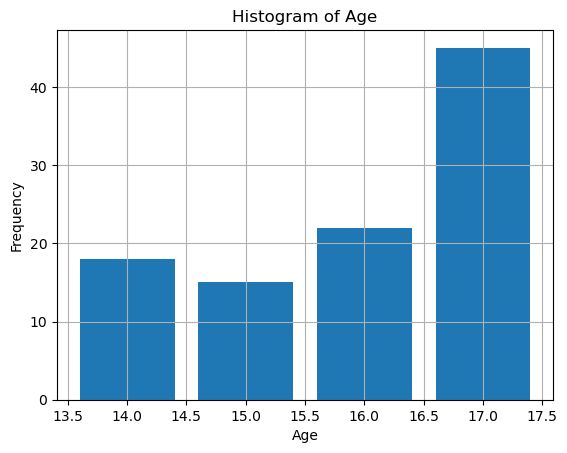

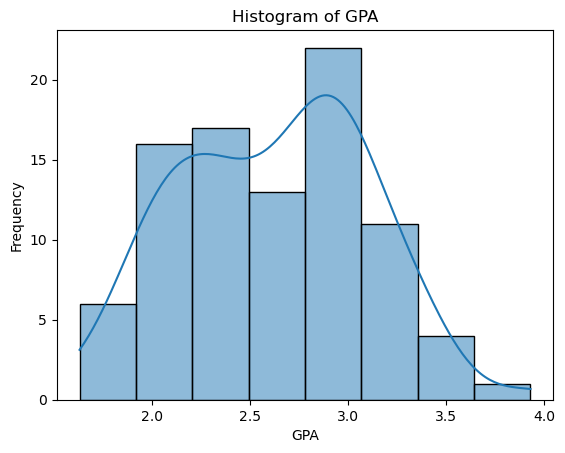

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df['age'].hist(bins=range(14, 19), align='left', rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

sns.histplot(df["gpa"], kde=True)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Histogram of GPA')
plt.show()

The histogram of age is skewed left. For GPA, only a few people have GPA above 3.5 or below 2.

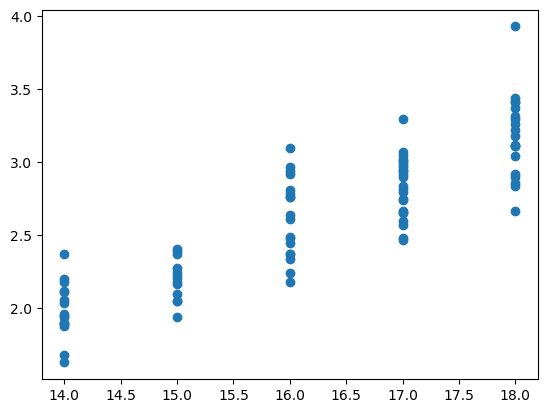

In [14]:
plt.scatter(df["age"],df["gpa"])
plt.show()

GPA trend up

In [15]:
import numpy as np
df['major'] = df['major'].str.lower()
df['major'] = df['major'].str.strip()
df['major'] = df['major'].replace('', np.nan)
df = df.dropna(subset=['major'])
print(df)

    student_id  age   gpa gender             major       year
0            1   14   NaN      F         economics   freshman
1            2   17  2.92      M           history     senior
2            3   17  2.97      F           physics     senior
3            4   16  2.76      F           physics     junior
4            5   16  2.24      M         chemistry     junior
..         ...  ...   ...    ...               ...        ...
95          96   15  2.37      M               art  sophomore
96          97   15  2.10      M               art  sophomore
97          98   17  2.80      F  computer science     senior
98          99   17  2.75      F    computer scien     senior
99         100   14  1.96      M           biology   freshman

[95 rows x 6 columns]


In [16]:
df.to_csv("students_clean.csv", index=False)

Conclusion: GPA goes up with students' age. This might be biased because not many people in lower ages attend. Each year doesn't have the same sample size.